# Оценка А/Б тестирования #

В данном исследовании необходимо оценить А/Б тестирование. Для оценки мы будем опираться на Техническое задание (ТЗ).

`Основные задачи, которые необходимо выполнить в данном проекте:`

1. Выгрузить данные и сделать их предобработку.

2. Проанализировать данные в 4-х датасетах.

3. Сравнить условия, прописанные в ТЗ с теми данными, которые мы получили при анализе.

4. Применить статистический метод для нахождения статистически значимого различия конверсий между группами теста по каждому событию.

Ниже представлено ТЗ.

**Техническое задание**:

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

<h1>ОГЛАВЛЕНИЕ<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными-и-их-предобработка" data-toc-modified-id="Знакомство-с-данными-и-их-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными и их предобработка</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определение-количества-аудитории-теста" data-toc-modified-id="Определение-количества-аудитории-теста-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение количества аудитории теста</a></span></li><li><span><a href="#Анализ-пользователей-в-тесте-'recommender_system_test'" data-toc-modified-id="Анализ-пользователей-в-тесте-'recommender_system_test'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ пользователей в тесте 'recommender_system_test'</a></span></li><li><span><a href="#Формирование-и-анализ-воронки-событий" data-toc-modified-id="Формирование-и-анализ-воронки-событий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Формирование и анализ воронки событий</a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Знакомство с данными и их предобработка ##

In [215]:
# импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt
import math as mth
from statsmodels.stats.proportion import proportions_ztest
from plotly import graph_objects as go
import matplotlib.ticker as mtick

**Выгрузим данные таблицы 'ab_project_marketing_events' - таблицу с данными о проводимых мероприятиях.**

In [114]:
# выгрузим календарь маркетинговых событий на 2020 год

marketing_events = pd.read_csv("C:/Users/User/Desktop/Проекты курса/Проект №4/ab_project_marketing_events.csv")

marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

In [115]:
# выведем информацию по всему датафрейму

marketing_events.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


В данной датафрейме мы видим 4 столбца, 14 строк. Пропусков нет.

In [116]:
# изменим тип данных у дат

marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])

marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [117]:
# самая ранняя и самая поздняя дата начала мероприятий

print(f"Самая ранняя дата начала мероприятий: {marketing_events['start_dt'].min()}")
print(f"Самая поздняя дата начала мероприятий: {marketing_events['start_dt'].max()}")

Самая ранняя дата начала мероприятий: 2020-01-25 00:00:00
Самая поздняя дата начала мероприятий: 2020-12-30 00:00:00


In [118]:
# проверим тип данных

marketing_events.dtypes

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object

In [119]:
# проверим явные дубликаты

marketing_events.duplicated().sum()

0

In [120]:
# проверим неявные дубликаты

marketing_events.regions.unique()

array(['EU, N.America', 'EU, CIS, APAC, N.America', 'N.America', 'APAC',
       'EU, CIS, APAC', 'CIS'], dtype=object)

Дубликаты отсутствуют в датафрейме.

In [121]:
# выведем таблицу

marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


**Выгрузим данные таблицы 'final_ab_new_users' - данные о новых пользователях.**

In [122]:
# пользователи, зарегистрировавшиеся с 7 по 23 декабря 2020 года

registered_users = pd.read_csv('C:/Users/User/Desktop/Проекты курса/Проект №4/final_ab_new_users.csv')

registered_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

In [123]:
# отразим общую информацию о датафрейме

registered_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


В датафрейме 4 столбца, 61733 строк. Пропусков нет.

In [124]:
# изменим тип данных в столбце с датами

registered_users['first_date'] = registered_users['first_date'].astype('datetime64[D]')


In [125]:
# проверим еще раз типы данных

registered_users.dtypes

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

In [126]:
# определим диапазон дат в датафрейме


print(f" Самая ранняя дата регистраций: {registered_users.first_date.min()}")

print(f" Самая поздняя дата регистраций: {registered_users.first_date.max()}")

 Самая ранняя дата регистраций: 2020-12-07 00:00:00
 Самая поздняя дата регистраций: 2020-12-23 00:00:00


Новые пользователи регистрировались с 07.12.20 по 23.12.20.

In [127]:
# проверим на неявные дубликаты столбец с регионами

registered_users.region.unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [128]:
# проверим на неявные дубликаты столбец с названием устройств

registered_users.device.unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [129]:
# проверим явные дубликаты

registered_users.duplicated().sum()

0

Явных и неявных дубликатов в датафрейме нет.

In [130]:
# количество уникальных пользователей

registered_users['user_id'].nunique()

61733

In [131]:
# выведем первые 5 строк

registered_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


**Выгрузим данные таблицы 'final_ab_events' - данные о действиях пользователей.**

In [132]:
# действия пользователей в период с 7 декабря 2020 по 30 декабря 2020 года.

action_users = pd.read_csv('C:/Users/User/Desktop/Проекты курса/Проект №4/final_ab_events.csv')

action_users.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [133]:
# отразим информацию по всему датафрейму

action_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

В датафрейме 4 столбца, 440317 строк. Пропуски имеются в столбце 'details'.

In [134]:
# изменим тип данных в столбце с датой и временем

action_users['event_dt_with_time'] = action_users['event_dt']
action_users['event_dt'] = action_users['event_dt'].astype('datetime64[D]')
action_users['event_dt']

0        2020-12-07
1        2020-12-07
2        2020-12-07
3        2020-12-07
4        2020-12-07
            ...    
440312   2020-12-30
440313   2020-12-30
440314   2020-12-30
440315   2020-12-30
440316   2020-12-30
Name: event_dt, Length: 440317, dtype: datetime64[ns]

In [135]:
# определим диапазон дат в датафрейме


print(f" Самая ранняя дата регистраций: {action_users.event_dt.min()}")

print(f" Самая поздняя дата регистраций: {action_users.event_dt.max()}")

 Самая ранняя дата регистраций: 2020-12-07 00:00:00
 Самая поздняя дата регистраций: 2020-12-30 00:00:00


Действия пользователей совершались с 07.12.20 по 30.12.20.

In [136]:
# проверим тип данных

action_users.dtypes

user_id                       object
event_dt              datetime64[ns]
event_name                    object
details                      float64
event_dt_with_time            object
dtype: object

In [137]:
# проверим на наличие явных дубликатов

action_users.duplicated().sum()

0

In [138]:
# удалим дубликаты

action_users = action_users.drop_duplicates()

action_users.duplicated().sum()

0

In [139]:
# проверим на наличие неявных дубликатов

action_users.event_name.unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [140]:
# посчитаем пропуски в столбце 'details'

action_users.isna().sum()

user_id                    0
event_dt                   0
event_name                 0
details               377577
event_dt_with_time         0
dtype: int64

85,8 % пропусков содержит столбец 'details'.

In [141]:
# проверим, какие события имеют пропуски в столбце 'details'

action_users[action_users['details'].isna()]['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

Пропуски есть только в тех столбцах, которые не связаны с покупкой. В столбце 'purchase' как раз отображется информация о покупке, в том числе о сумме. Поэтому пропуски можно заменить на заглушки.

In [142]:
# заменим пропуски

action_users['details'] = action_users['details'].fillna(0)

# проверим пропуски

action_users.isna().sum()

user_id               0
event_dt              0
event_name            0
details               0
event_dt_with_time    0
dtype: int64

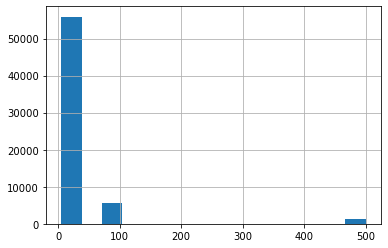

In [143]:
# построение гистограммы для отражения распределения данных по столбцу 'details'


action_users.query('event_name == "purchase"')['details'].hist(bins=15);

In [144]:
# с помощью описательной статистики опишем данные в столбце 'details'

action_users.query('event_name == "purchase"')['details'].describe()

count    62740.000000
mean        23.877631
std         72.180465
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64

В основном пользователи делали заказы на сумму от 4,99 до 9,99 у.е.

In [145]:
# количество уникальных пользователей

action_users['user_id'].nunique()

58703

В данном датафрейме 58703 уникальных пользователей.

**Выгрузим данные таблицы 'final_ab_participants' - данные об участниках тестов.**

In [146]:
# таблица участников тестов

test_users = pd.read_csv('C:/Users/User/Desktop/Проекты курса/Проект №4/final_ab_participants.csv')

test_users

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

In [147]:
# выведим общую информацию о датафрейме

test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


В датафрейме 3 столбца, 18268 строк. Пропусков нет.

In [148]:
# проверим на явные дубликаты

test_users.duplicated().sum()

0

In [149]:
# количество уникальных пользователей в датафрейме

test_users.user_id.nunique()

16666

In [150]:
# проверим, какие группы есть

test_users.group.unique()

array(['A', 'B'], dtype=object)

In [151]:
# проверим описание групп

test_users.ab_test.unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

В данном датафрейме есть данные по 2-м тестах. Значит в дальнейшем необходимо будет проверить - пересекается ли тестовая аудитория с конкурирующим тестом.

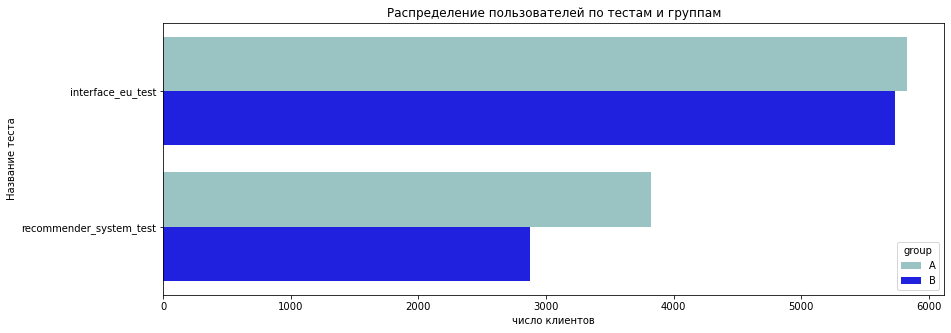

In [152]:
# выведем, как распределяются пользователи в зависимости от теста и группы

fig, ax = plt.subplots(figsize = (14,5))

ax = sns.barplot(y='ab_test',
            x='user_id',
            hue="group",
            data=test_users.groupby(['ab_test','group'], as_index=False)[['user_id']].nunique(),
            palette=['#93CACA', 'blue'])

ax.set_title('Распределение пользователей по тестам и группам')
ax.set(xlabel='число клиентов', ylabel='Название теста');

Примерно одинаково пользователи были разделены на группы в тесте 'interface_eu_test'. 

Во втором тесте пользователи распределены между группами хуже, есть большая разница. 

Более детальный анализ групп проведем в следующем разделе.

## Анализ данных ##

### Определение количества аудитории теста ###

In [153]:
# создадим одну общую таблицу путем объединения  таблицы с пользователями из А/Б теста с данными о регистрации и о событиях

data_test_users = test_users.merge(registered_users, on='user_id', how='left')\
.merge(action_users,on='user_id', how='outer')

In [154]:
data_test_users.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,event_dt_with_time
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99,2020-12-07 14:43:27
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99,2020-12-25 00:04:56
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00,2020-12-07 14:43:29
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00,2020-12-25 00:04:57
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00,2020-12-07 14:43:27


In [155]:
# измененим название столбца

data_test_users = data_test_users.rename(columns={'first_date':'date_registration'})


In [156]:
# оставим пользователей, которые зарегистрировались до 21.12.20 включительно

data_test_users = data_test_users.query('date_registration <= "2020-12-21"')

In [157]:
# сохраним в  отдельной переменной данные по пользователям для дальнейшего анализа по регионам

data_regions_filter_users = data_test_users

In [158]:
# оставим пользователей только из Европы

data_test_users = data_test_users.query('region == "EU"')

# посчитаем общее количество уникальных пользователей по 2-м тестам

data_test_users.user_id.nunique()

15314

In [159]:
# определим пересекается ли аудитория тестов друг с другом

id_users_actual_test = list(data_test_users.query('ab_test == "recommender_system_test"')['user_id'].unique())

id_users_competitor_test = list(data_test_users.query('ab_test == "interface_eu_test"')['user_id'].unique())

users_drop = []

for users in id_users_actual_test:
    if users in id_users_competitor_test:
        users_drop.append(users)
        
len(users_drop)

1602

1602 или 10 % пользователей одновременно участвуют в 2-х тестах. Такое пересечение может сказаться на общем результате, поскольку мы не будем уверены  - что именно пользователя подтолкнуло на покупку. В связи с этим, узнаем id таких пользователей и удалим их в тесте, который требует ТЗ.

In [160]:
# уберем пользователей, которые встречаются одновременно в 2-х тестах

data_test_users = data_test_users.query('~user_id.isin(@users_drop)')

Теперь посчитаем процент пользователей из Европы, которые принимают участие в тесте `'recommender_system_test'`. Для этого найдем количество всех пользователей из Европы, которые зарегистрировались до 21.12.20 включительно. В другой переменной определим количество пользователей из Европы, зарегистрированных так же до 21.12.20, но еще добавим фильтр по виду теста, и удалим тех, кто встречается в 2-х тестах одновременно.

In [161]:
# создадим переменную, в которой сохраним общее количество пользователей из Европы

data_test_users_regions = registered_users.query('first_date <= "2020-12-21"')\
.groupby('region',as_index=False)['user_id'].nunique().query('region == "EU"')['user_id']

data_test_users_regions

2    42340
Name: user_id, dtype: int64

In [162]:
# сохраним в переменную данные, в которых нет пользователей, участвовавших в 2-х тестах,
# также в которых есть данные пользователей по нужному нам тесту

data_regions_filter_users = data_regions_filter_users\
.query('(~user_id.isin(@users_drop)) and ab_test == "recommender_system_test"')

# сгруппируем по регионам, чтобы узнать число пользователей из Европы

data_regions_filter_users = data_regions_filter_users\
.groupby('region',as_index=False)['user_id'].nunique()\
.query('region == "EU"')['user_id']

data_regions_filter_users

2    4749
Name: user_id, dtype: int64

In [163]:
# найдем процент пользователей из Европы

(data_regions_filter_users / data_test_users_regions) * 100

2    11.216344
Name: user_id, dtype: float64

Пользователи в тесте из Европы составляют 11 %, а не 15 %, как заявлено в ТЗ.

In [164]:
# оставим пользователей только из теста 'recommender_system_test'

recommender_system_test_data = data_test_users\
.query('ab_test == "recommender_system_test"')


In [165]:
# проверим есть ли пропуски

recommender_system_test_data.isna().sum()

user_id                  0
group                    0
ab_test                  0
date_registration        0
region                   0
device                   0
event_dt              2155
event_name            2155
details               2155
event_dt_with_time    2155
dtype: int64

Мы видим, что 2155 пользователей не имеют событий. Рассмотрим их более подробно.

In [166]:
# отберем пользователей, которые не имеют событий

not_events_users = recommender_system_test_data.query('event_name.isna()')

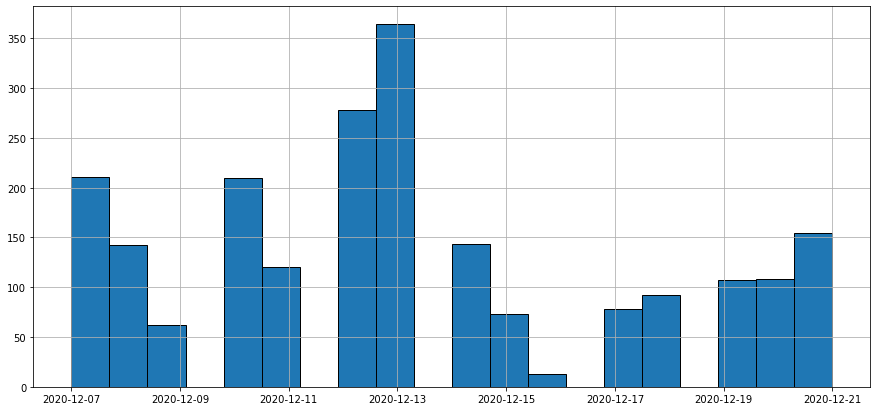

In [167]:
# посмотрим, в какие даты было максимальное количество регистраций пользователей без событий

not_events_users['date_registration'].hist(figsize=(15,7),bins=20,edgecolor="black");

13.12.20 пользователи активнее регистрировались,чем в остальные дни. Тем не менее, мы видим, что пользователи регистрировались каждый день до 21.12.20 включительно, но непонятно, почему больше не возвращались к ресурсу.

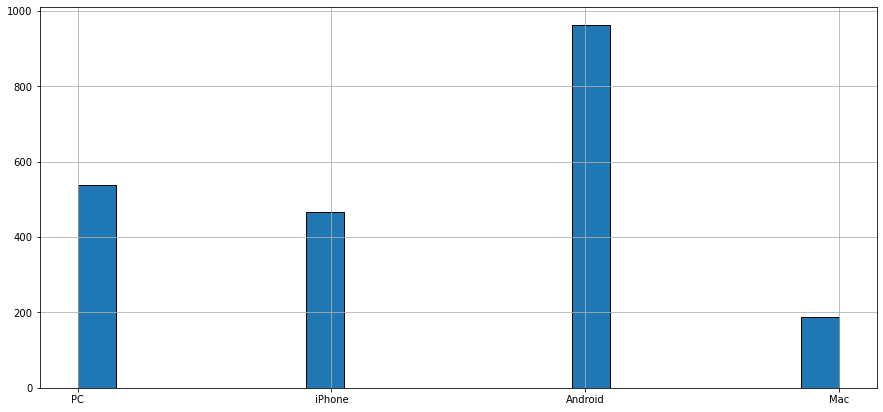

In [168]:
# проверим с каких устройств регистрировались такие пользователи

not_events_users['device'].hist(figsize=(15,7),bins=20,edgecolor="black");

Пользователи активно пользовались Android при регистрации.

Построим линейный график распределения количества регистраций пользователей без событий по группам теста.

In [169]:
# сохраним в переменной группировку по дате и группе и посчитаем уникальных пользователей

users_registr_date = not_events_users.groupby(['date_registration','group'], as_index=False)['user_id'].nunique()

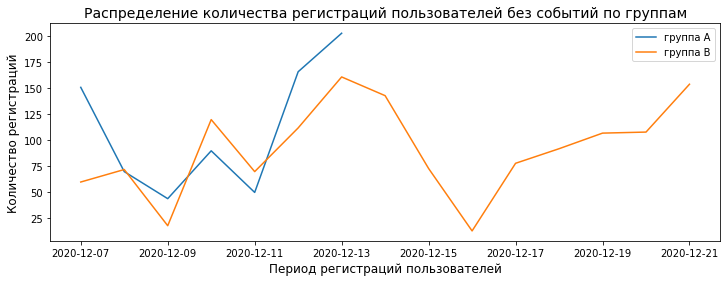

In [170]:
# построим линейный график распределения количества регистраций пользователей без событий по группам теста

plt.subplots(figsize = (12,4))

plt.plot(users_registr_date.query('group == "A"')['date_registration'], 
        users_registr_date.query('group == "A"')['user_id'], 
         label='группа A')

plt.plot(users_registr_date.query('group == "B"')['date_registration'], 
         users_registr_date.query('group == "B"')['user_id'], 
         label='группа B')

plt.legend()

plt.xlabel('Период регистраций пользователей', fontsize=12)

plt.ylabel('Количество регистраций', fontsize=12)

plt.title('Распределение количества регистраций пользователей без событий по группам',fontsize=14);

Мы видим, что график по группе А обрывается на дате 13.12.20, т.е. регистраций больше не было. Вероятно в системе сбора информации были технические неполадки. А что касается группы В, то график непрерывный, причем самая низкая активность зафиксирована 16.12.20. 

In [171]:
# проверим,  есть ли такая проблема в другом тесте

data_test_users.query('(ab_test == "interface_eu_test") and (event_name.isna())')

,user_id,group,ab_test,date_registration,region,device,event_dt,event_name,details,event_dt_with_time
72280,4205CA68D53300E0,B,interface_eu_test,2020-12-07,EU,Android,NaT,NaN,NaN,NaN
105904,4AF24163EE3C7B84,A,interface_eu_test,2020-12-07,EU,iPhone,NaT,NaN,NaN,NaN


В другом тесте всего 2 пропуска, это не критично. Можно сказать, что в конкурирующем тесте практически все пользователи имеют события.

По итогу, в тесте `'recommender_system_test'` мы выяснили, что есть 2155 или 45 % пользователей, которые вероятно потеряли интерес к ресурсу и только смогли зарегистрироваться. Также, мы узнали, что бОльшая часть из них заходило через Android и пик регистраций был 13.12.20. Необходимо анализировать таких пользователей в дальнейшем и искать причины, почему такое количество не пользуется ресурсом, а также выяснять, почему произошло обрывание графика у группы А. Но в тесте 'recommender_system_test' мы вынуждены удалить таких пользователей, чтобы не искажать результат.

In [172]:
# удалим пропуски в данных

recommender_system_test_data = recommender_system_test_data.dropna()

# проверим датафрейм на пропуски 

recommender_system_test_data.isna().sum()

user_id               0
group                 0
ab_test               0
date_registration     0
region                0
device                0
event_dt              0
event_name            0
details               0
event_dt_with_time    0
dtype: int64

In [173]:
# посчитаем количество уникальных пользователей после удаления пропусков

recommender_system_test_data.user_id.nunique()

2594

Итак, после удаления неподходящих нам пользователей, мы видим, что аудитория теста сократилась и состоит из 2594 людей вместо 6000, которое прописано в ТЗ. Т.е. условие по количеству участников теста не выполняется.

### Анализ пользователей в тесте 'recommender_system_test' ###

Проверим, как распределены пользователи внутри теста.

In [174]:
# проверим есть ли пользователи, которые одновременно участвуют в 2-х группах

count = 0
for t in recommender_system_test_data['user_id'].unique():
    a = recommender_system_test_data.query('user_id == @t')
    if a['group'].nunique() > 1:
        count+= 1
print(count)

0


Нет пересечений между группами. Это хороший показатель, но необходимо также проверить, в каких пропорциях участники распределены между группами.

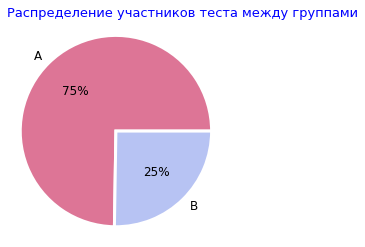

In [175]:
# посчитаем и сохраним в переменной количество пользователей в каждой группе

share_group = recommender_system_test_data.groupby('group', as_index=False)[['user_id']].nunique()

# построим круговую диаграмму, где отразим распределение посетителей по группам теста

plt.pie(share_group['user_id'],
        labels=share_group['group'],
        autopct='%1.0f%%',
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        radius=1.1,
        textprops={'fontsize': 12},
        colors=['#DD7596','#B7C3F3']);
  

plt.title('Распределение участников теста между группами',loc='left',color='b',fontsize = 13);

Итак, мы видим, что участники распределены непропорционально - 75 % в группе А и 25 % в группе В, что является отрицательным моментов для дальнейшего проведения А/Б теста. Ведь, прежде всего, залог получения достоверных результатов теста зависит от того, на сколько точно и качественно отобраны участники теста.

In [176]:
# определим диапазон дат в датафрейме


print(f"Самая ранняя дата событий: {recommender_system_test_data.event_dt.min()}")

print(f"Самая поздняя дата событий: {recommender_system_test_data.event_dt.max()}")

Самая ранняя дата событий: 2020-12-07 00:00:00
Самая поздняя дата событий: 2020-12-30 00:00:00


Дата запуска и дата остановки набора новых пользователей совпадают с ТЗ. А вот дата остановки теста в ТЗ указана некорректно, в действительности дату остановки теста необходимо считать 30.12.20, так как после этой даты у нас нет данных о событиях.

В ТЗ указан горизонт событий - 14 дней с момента регистрации пользователей. В нашем же случае, дата остановки теста - 30.12.20 вместо 04.01.21. Соответственно, пользователи, зарегистрированные с 18.12.20 по 21.12.20 не имели полноценных двух недель для осуществления покупки. Но нам необходимо проверить, действительно ли нужно 2 недели для того, чтобы сформировалась воронка событий или же пользователи после регистрации могли в короткие сроки оплатить заказ.

Для начала рассчитаем лайфтайм по каждому пользователю,  чтобы определить, где с момента регистрации до выполнения какого-либо действия прошло больше 14 дней.

In [177]:
# добавим новый столбец с рассчитанным количеством дней с даты регистрации и датой события

recommender_system_test_data['lifetime'] = (recommender_system_test_data['event_dt']
                                            - recommender_system_test_data['date_registration'])\
.dt.days

recommender_system_test_data['lifetime'] = recommender_system_test_data['lifetime'] + 1

In [178]:
# количество строк в датасете

recommender_system_test_data.shape[0]

17526

In [179]:
# посчитаем, сколько действий выполняли пользователи больше 14 дней с момента регистрации

recommender_system_test_data.query('lifetime > 14').shape[0]

608

3.5 % событий необходимо удалить из датафрейма, так как тест предполагает горизонт событий - 14 дней. 

In [180]:
# удалим те строки, горизонт событий у которых превышает 14 дней

recommender_system_test_data = recommender_system_test_data.query('lifetime <= 14')

In [181]:
# проверим количество уникальных пользователей

recommender_system_test_data.user_id.nunique()

2594

Количество уникальных пользователей не изменилось после удаления строк.

In [182]:
# отсортируем данные по дате регистрации, по дате и времени события, 
# сделаем фильтрацию по датам регистрации - с 18.12.20 по 21.12.20

test = recommender_system_test_data.sort_values(by=['date_registration','event_dt_with_time'])\
.query('date_registration >= "2020-12-18" and date_registration <= "2020-12-21"')
test

,user_id,group,ab_test,date_registration,region,device,event_dt,event_name,details,event_dt_with_time,lifetime
6898,D02C5540559EC8AF,A,recommender_system_test,2020-12-18,EU,Android,2020-12-18,product_page,0.00,2020-12-18 00:04:35,1
6900,D02C5540559EC8AF,A,recommender_system_test,2020-12-18,EU,Android,2020-12-18,login,0.00,2020-12-18 00:04:35,1
29480,01157AAD4401952B,A,recommender_system_test,2020-12-18,EU,iPhone,2020-12-18,purchase,499.99,2020-12-18 00:07:20,1
29483,01157AAD4401952B,A,recommender_system_test,2020-12-18,EU,iPhone,2020-12-18,product_page,0.00,2020-12-18 00:07:20,1
29486,01157AAD4401952B,A,recommender_system_test,2020-12-18,EU,iPhone,2020-12-18,login,0.00,2020-12-18 00:07:20,1
...,...,...,...,...,...,...,...,...,...,...,...
23579,CBF4133918976020,A,recommender_system_test,2020-12-21,EU,Android,2020-12-29,login,0.00,2020-12-29 19:46:56,9
2519,4AEC1F638C2F1FC8,A,recommender_system_test,2020-12-21,EU,PC,2020-12-29,product_page,0.00,2020-12-29 21:29:15,9
2523,4AEC1F638C2F1FC8,A,recommender_system_test,2020-12-21,EU,PC,2020-12-29,login,0.00,2020-12-29 21:29:15,9
25747,817B7DE353CE7825,A,recommender_system_test,2020-12-21,EU,Android,2020-12-29,login,0.00,2020-12-29 23:38:09,9


In [183]:
# определим, сколько покупок было совершено всего

test.query('event_name == "purchase"').user_id.count()

956

In [184]:
# посчитаем сколько уникальных пользователей всего

test.user_id.nunique()

1003

In [185]:
# посчитаем сколько уникальных пользователей оплатили

test.query('event_name == "purchase"').user_id.nunique()

339

14 % покупок от общего количества событий было в период с 18.12.20 по 21.12.20 и 33 % пользователей оплатили заказ. 

Для сравнения определим количество покупок по тем пользователям, которые укладываются в 14 дней.

In [186]:
# отсортируем данные по дате регистрации и по дате и времени события, 
# оставим пользователей, которые зарегистрировались раньше 18.12.20

test2 = recommender_system_test_data.sort_values(by=['date_registration','event_dt_with_time'])\
.query('date_registration < "2020-12-18"')

test2

,user_id,group,ab_test,date_registration,region,device,event_dt,event_name,details,event_dt_with_time,lifetime
4420,20996AEF74602821,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,purchase,9.99,2020-12-07 00:16:00,1
4425,20996AEF74602821,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,product_page,0.00,2020-12-07 00:16:00,1
4430,20996AEF74602821,A,recommender_system_test,2020-12-07,EU,Android,2020-12-07,login,0.00,2020-12-07 00:16:00,1
29319,115EBC1CA027854A,B,recommender_system_test,2020-12-07,EU,Android,2020-12-07,product_page,0.00,2020-12-07 00:25:02,1
29328,115EBC1CA027854A,B,recommender_system_test,2020-12-07,EU,Android,2020-12-07,login,0.00,2020-12-07 00:25:02,1
...,...,...,...,...,...,...,...,...,...,...,...
8446,9F4F58990EAB3DFE,A,recommender_system_test,2020-12-17,EU,Android,2020-12-29,login,0.00,2020-12-29 17:39:13,13
27235,24834C656421236A,A,recommender_system_test,2020-12-17,EU,iPhone,2020-12-29,purchase,4.99,2020-12-29 21:14:34,13
27247,24834C656421236A,A,recommender_system_test,2020-12-17,EU,iPhone,2020-12-29,login,0.00,2020-12-29 21:14:34,13
27239,24834C656421236A,A,recommender_system_test,2020-12-17,EU,iPhone,2020-12-29,product_cart,0.00,2020-12-29 21:14:35,13


In [187]:
# определим, сколько покупок было совершено всего

test2.query('event_name == "purchase"').user_id.count()

1321

In [188]:
# посчитаем сколько уникальных пользователей всего

test2.user_id.nunique()

1591

In [189]:
# посчитаем сколько уникальных пользователей оплатили

test2.query('event_name == "purchase"').user_id.nunique()

465

12 % покупок от общего количества событий и 29 % пользователей оплатили заказ. 

Из этого делаем вывод, что необязательно нужны 2 недели для формирования воронки. Зарегистрированные пользователи с 18.12 по 21.12 имеют больше конверсию, чем те, у которых есть 14 дней для совершения покупки.

Теперь необходимо проверить, проводились ли маркетинговые события в период проведения теста.

In [190]:
# выведем календарь маркетинговых событий

marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Определим, какие события проходили в период теста.

In [191]:
# проверим, какое маркетинговое событие проходило в период теста

marketing_events.query('start_dt <= "2021-01-04" and finish_dt >= "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Мы видим, что в нужном нам регионе и в период теста проводилось мероприятие 'Christmas&New Year Promo', период проведения с 25.12.20 по 03.01.21.

Посмотрим на распределение событий по дням, чтобы проверить была ли повышенная активность именно в период рекламной кампании.

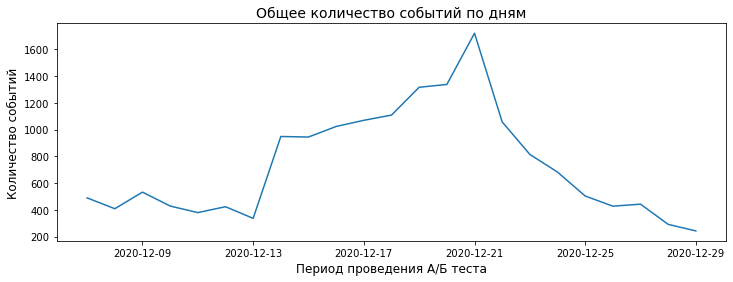

In [192]:
# построим линейный график, отражающий общее количество событий по датам


plt.subplots(figsize = (12,4))

plt.plot(recommender_system_test_data.groupby('event_dt', as_index=False)['event_name'].count()['event_dt'], 
         recommender_system_test_data.groupby('event_dt', as_index=False)['event_name'].count()['event_name'])

plt.xlabel('Период проведения А/Б теста', fontsize=12)

plt.ylabel('Количество событий', fontsize=12)

plt.title('Общее количество событий по дням',fontsize=14);

Мы не видим увеличения активности 25.12.20, значит маркетинговое событие вряд ли могло повлиять на аудиторию теста. Пик активности был 21.12.20, и к 30.12.20 количество событий резко сократилось. Далее, проверим более детально события по каждой группе теста.

In [193]:
# сохраним в отдельных переменных количество событий по каждой группе

A_count_event = recommender_system_test_data.query('group =="A"').groupby('event_dt', as_index=False)['event_name'].count()

B_count_event = recommender_system_test_data.query('group =="B"').groupby('event_dt', as_index=False)['event_name'].count()

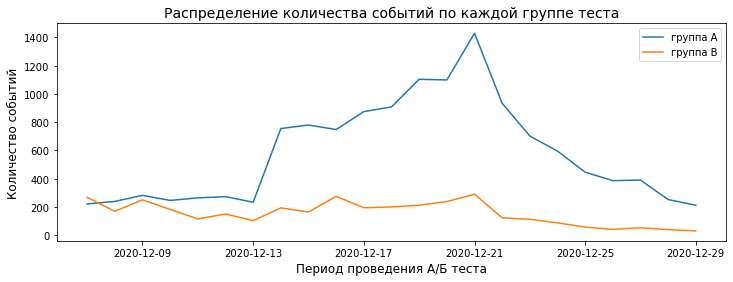

In [194]:
# построим линейный график распределения количества событий по каждой группе теста

plt.subplots(figsize = (12,4))

plt.plot(A_count_event['event_dt'], 
         A_count_event['event_name'], 
         label='группа A')

plt.plot(B_count_event['event_dt'], 
         B_count_event['event_name'], 
         label='группа B')

plt.legend()

plt.xlabel('Период проведения А/Б теста', fontsize=12)

plt.ylabel('Количество событий', fontsize=12)

plt.title('Распределение количества событий по каждой группе теста',fontsize=14);

Мы видим 2 резких увеличения количества событий у группы А - 14.12.20 и 21.12.20. Это может быть связано с сезонностью. В период с 14.12.20 по 21.12.20 количество событий выросло примерно в 1,7 раза, далее активность пользователей  стала постепенно уменьшаться до конца теста. Вероятно, в преддверии Нового года пользователи активнее пользовались ресурсом для поиска и покупки подарков. Также, причина в таком резком увеличении может быть связана с тем, что новые пользователи могли регистрироваться только до 21.12.20. Если бы набор продолжался, то,вероятно, высокая активность сохранялась из-за предстоящих праздников. Стоит также принять во внимание ошибки в сборе самой информации и технические ошибки, которые могли возникнуть на ресурсе, из-за чего пользователям пришлось несколько раз логиниться или перезаходить на страницу с товаром, например.

Что касается группы B, то небольшой подъем активности мы наблюдаем так же с 14.12.20 по 21.12.20.

In [195]:
# выведем первые 5 строк

recommender_system_test_data.head()

,user_id,group,ab_test,date_registration,region,device,event_dt,event_name,details,event_dt_with_time,lifetime
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99,2020-12-07 14:43:27,1
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00,2020-12-07 14:43:29,1
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00,2020-12-07 14:43:27,1
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,login,0.00,2020-12-07 14:43:27,1
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,product_page,0.00,2020-12-20 15:46:06,1


In [196]:
# сгруппируем события по дате и посмотрим, какое событие лидирует

count_event_date = recommender_system_test_data.groupby(['event_dt','event_name'], as_index=False)['user_id']\
.count()\
.sort_values(by=['event_dt','user_id'], ascending=[True,False])

count_event_date.index = count_event_date.event_dt

count_event_date

,event_dt,event_name,user_id
event_dt,,,
2020-12-07,2020-12-07,login,217
2020-12-07,2020-12-07,product_page,142
2020-12-07,2020-12-07,purchase,74
2020-12-07,2020-12-07,product_cart,56
2020-12-08,2020-12-08,login,189
...,...,...,...
2020-12-28,2020-12-28,purchase,35
2020-12-29,2020-12-29,login,108
2020-12-29,2020-12-29,product_page,68


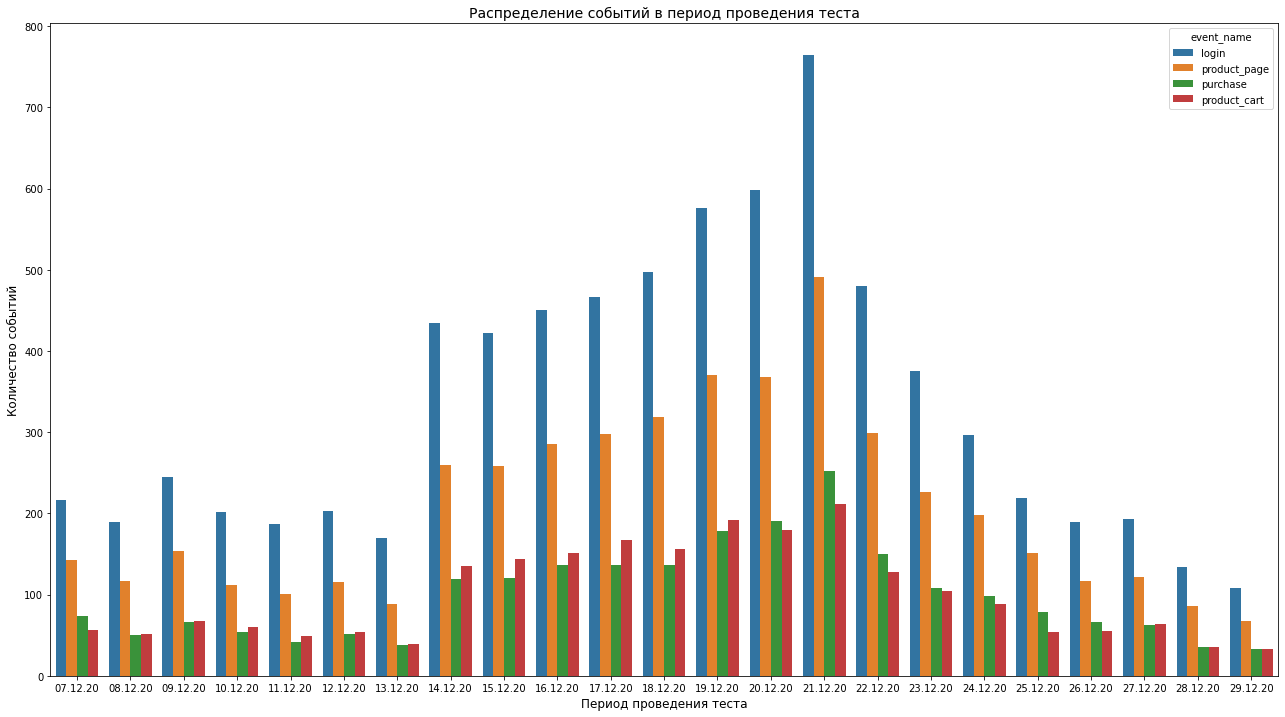

In [197]:
# построим барплот

fig, ax = plt.subplots(figsize = (22,12))

ax = sns.barplot(y='user_id',
            x=count_event_date.index.strftime('%d.%m.%y'),
            hue="event_name",
            data=count_event_date)

ax.set_title('Распределение событий в период проведения теста', fontsize=14)
ax.set(xlabel='Период проведения теста', ylabel='Количество событий')
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12);

Данная диаграмма подтверждает, что 21.12.20 пользователи активнее всего логинились, просматривали товары, добавляли их в корзину и оплачивали заказ. А начиная с 14.12.20 и до 21.12.20 вкл. мы видим в целом повышенную активность пользователей в пользовании ресурсом. 

Сезонность, как и маркетинговые мероприятия, также могут неблагоприятно повлиять на результат теста. Но очень много данных о пользователях мы потеряем, если будем убирать активность на фоне предстоящих праздников. В связи с этим, было принято решение не исключать данные из теста.

In [198]:
# проверим все ли группы теста фигурируют в событиях

recommender_system_test_data.groupby('event_name')['group'].nunique()

event_name
login           2
product_cart    2
product_page    2
purchase        2
Name: group, dtype: int64

Пользователи обеих групп теста совершали все виды событий.

In [199]:
# Определим, сколько в среднем событий приходится на 1 пользователя

count_event_per_user = recommender_system_test_data.groupby('user_id',as_index=False)['event_name'].count()

count_event_per_user

,user_id,event_name
0,0010A1C096941592,12
1,003DF44D7589BBD4,15
2,00505E15A9D81546,5
3,005E096DBD379BCF,4
4,006E3E4E232CE760,6
...,...,...
2589,FF5A1CD38F5DD996,10
2590,FF5B24BCE4387F86,9
2591,FF825C1D791989B5,8
2592,FF8CF7057415EB29,4


In [200]:
# опишем данные в датафрейме

count_event_per_user.describe()

,event_name
count,2594.000000
mean,6.521974
std,3.752220
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,24.000000


50 % пользователей имеют 6 событий. Среди пользователей есть те, кто совершили 24 события в период теста.

In [201]:
# Сгруппируем данные по пользователям, по группам и посчитаем количество событий

count_event_per_user_group = recommender_system_test_data.groupby(['group','user_id'],as_index=False)['event_name'].count()

# опишем с помощью описательной статистики количество событий по группе A

count_event_per_user_group.query('group == "A"')['event_name'].describe()


count    1939.000000
mean        6.897370
std         3.830825
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        24.000000
Name: event_name, dtype: float64

In [202]:
# опишем с помощью описательной статистики количество событий по группе B

count_event_per_user_group.query('group == "B"')['event_name'].describe()

count    655.000000
mean       5.410687
std        3.267981
min        1.000000
25%        3.000000
50%        4.000000
75%        6.500000
max       24.000000
Name: event_name, dtype: float64

В группе А 50 % пользователей имеют 6 событий. В группе B половина пользователей имеют чуть меньше событий по сравнению с группой А, медианное значение составляет 4. Максимальное количество в обеих группах одинаковое и составляет 24.

### Формирование и анализ воронки событий ###

**Проанализируем воронку событий.**

In [203]:
# Посчитаем количество уникальных пользователей по каждому логу

event_funnel_total = recommender_system_test_data.pivot_table(index='event_name', values='user_id', aggfunc='nunique')

event_funnel_total['share'] = round( ( event_funnel_total.user_id / recommender_system_test_data.user_id.nunique()) * 100,1)

event_funnel_total = event_funnel_total.reindex(['login', 'product_page', 'product_cart', 'purchase'])

event_funnel_total = event_funnel_total.reset_index()

event_funnel_total

,event_name,user_id,share
0,login,2593,100.0
1,product_page,1632,62.9
2,product_cart,773,29.8
3,purchase,804,31.0


In [204]:
# Построим воронку событий без разбивки на группы теста

fig = go.Figure(go.Funnel(
    y = list(event_funnel_total['event_name']),
    x = list(event_funnel_total['user_id'])))
fig.show()

`Воронка событий следующая:`

1. Вход в личный кабинет.


2. Страница продукта.


3. Корзина.


4. Покупка.

`ИЛИ` другой ее вариант, если пользователь будет оформлять заказ не через корзину:

1. Вход в личный кабинет.


2. Страница продукта.



3. Покупка.

На данной воронке мы видим, что все пользователи из теста логинились. Также, можно отметить, что пользователей, совершивших покупку, больше, чем пользователей, которые посещали корзину. Получается, что пользователи в обход корзины делали заказ. Можно предположить, что клиенты воспользовались 'покупкой в 1 клик' и поэтому миновали корзину. 

**Теперь рассчитаем конверсию в воронке по каждой отдельной группе теста.**

In [205]:
# сформируем воронки событий по каждой группе теста

event_funnel_group = recommender_system_test_data.pivot_table(
    index='event_name',
    columns='group',
    values='user_id',
    aggfunc='nunique')

# поменяем местами корзину с покупкой

event_funnel_group = event_funnel_group.reindex(['login', 'product_page', 'product_cart', 'purchase'])

event_funnel_group = event_funnel_group.reset_index()

event_funnel_group

group,event_name,A,B
0,login,1939,654
1,product_page,1265,367
2,product_cart,589,184
3,purchase,613,191


In [206]:
# Создадим столбцы в таблице с общим количеством уникальных пользователей в каждой группе

event_funnel_group['total_users_A'] = share_group.loc[0,'user_id']

event_funnel_group['total_users_B'] = share_group.loc[1,'user_id']

event_funnel_group

group,event_name,A,B,total_users_A,total_users_B
0,login,1939,654,1939,655
1,product_page,1265,367,1939,655
2,product_cart,589,184,1939,655
3,purchase,613,191,1939,655


In [207]:
# посчитаем конверсию относительно первого события

event_funnel_group['conversion_from_1st_event_A'] = round( (event_funnel_group.A / event_funnel_group.total_users_A), 2)

event_funnel_group['conversion_from_1st_event_B'] = round( (event_funnel_group.B / event_funnel_group.total_users_B), 2)


event_funnel_group

group,event_name,A,B,total_users_A,total_users_B,conversion_from_1st_event_A,conversion_from_1st_event_B
0,login,1939,654,1939,655,1.00,1.00
1,product_page,1265,367,1939,655,0.65,0.56
2,product_cart,589,184,1939,655,0.30,0.28
3,purchase,613,191,1939,655,0.32,0.29


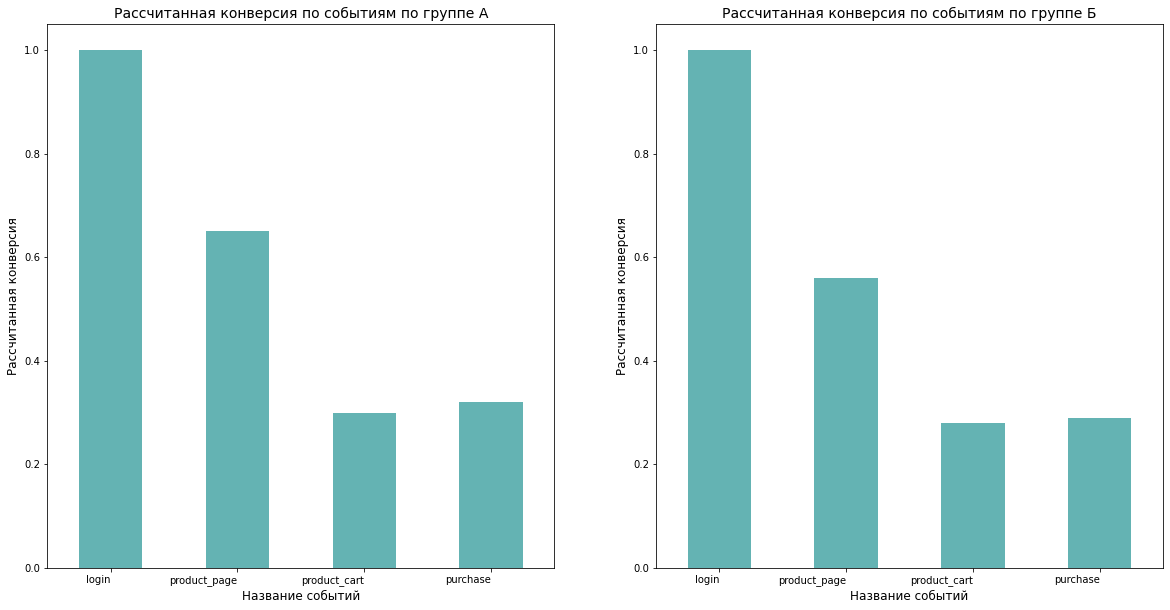

In [208]:
# построим барплот

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
event_funnel_group.\
plot(kind='bar', ax=ax0, legend=False, x='event_name',y='conversion_from_1st_event_A', color='#64B3B3')
ax0.set_title('Рассчитанная конверсия по событиям по группе А',fontsize= 14)
ax0.set_ylabel('Рассчитанная конверсия',fontsize= 12)
ax0.set_xlabel('Название событий',fontsize= 12)

event_funnel_group.\
plot(kind='bar',ax=ax1,legend=False, x='event_name',y='conversion_from_1st_event_B', color='#64B3B3')
ax1.set_title('Рассчитанная конверсия по событиям по группе Б',fontsize= 14)
ax1.set_ylabel('Рассчитанная конверсия',fontsize= 12)
ax1.set_xlabel('Название событий',fontsize= 12)

plt.setp(ax0.get_xticklabels() + ax1.get_xticklabels(), rotation=360, ha='right');

Мы видим, что у обеих групп конверсия в 'product_cart' и 'purchase' примерно на одном уровне.

Около 30 % в каждой группе пользователей завершили воронку событий.

## Изучение результатов эксперимента ##

Сформулируем нулевую и альтернативную гипотезы и с помощью z-теста проверим, если ли статистически значимая разница между конверсиями таких событий, как 'product_page', ' product_cart', ' purchase'.

Сравним контрольную группу А с экспериментальной группой В по 3-ем событиям - 'product_page', ' product_cart', ' purchase'.

`Проверим гипотезу о том, что между конверсиями обеих групп теста есть различия.

**Сформулируем гипотезы:**

`Нулевая гипотеза:` между долями групп А и В нет разницы.

`Альтернативная гипотеза:`  между долями групп А и В есть разница.

In [209]:
# выведем таблицу, которую будем использовать для тестирования

event_funnel_group

group,event_name,A,B,total_users_A,total_users_B,conversion_from_1st_event_A,conversion_from_1st_event_B
0,login,1939,654,1939,655,1.00,1.00
1,product_page,1265,367,1939,655,0.65,0.56
2,product_cart,589,184,1939,655,0.30,0.28
3,purchase,613,191,1939,655,0.32,0.29


Первый этап воронки удалим, так как все пользователи из обеих групп заходили в свой личный кабинет.

In [210]:
# удалим самый первый этап воронки - 'login'

event_funnel_group = event_funnel_group.drop([0])

event_funnel_group

group,event_name,A,B,total_users_A,total_users_B,conversion_from_1st_event_A,conversion_from_1st_event_B
1,product_page,1265,367,1939,655,0.65,0.56
2,product_cart,589,184,1939,655,0.30,0.28
3,purchase,613,191,1939,655,0.32,0.29


In [211]:
# Напишем функцию, которая позволит рассчитать статистическую значимость между долями 2-х групп

def z_test_groups(group_1,group_2,total_users_1, total_users_2, alpha):
    for index in event_funnel_group.index:
    
        count = np.array( [ event_funnel_group.loc[index, group_1], event_funnel_group.loc[index, group_2] ] )
    
        nobs = np.array( [ event_funnel_group.loc[index, total_users_1], event_funnel_group.loc[index, total_users_2] ] )
    
        stat, pval = proportions_ztest(count, nobs)
        
        pval = round(pval,6)
        
        print('p-значение:', pval)
        
        if pval < alpha:
            print(f"Отвергаем нулевую гипотезу: между долями есть значимая разница по событию {event_funnel_group.loc[index,'event_name']}")
        
        else:
            print(f"Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными по событию {event_funnel_group.loc[index,'event_name']}")


Уровень статистической значимости определим в 5 %.

In [212]:
# применим функцию и выясним есть ли между двумя выборками А и Б статистическая значимая разница по каждому событию

z_test_groups('A','B','total_users_A','total_users_B', 0.05)

p-значение: 2.5e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница по событию product_page
p-значение: 0.268993
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными по событию product_cart
p-значение: 0.240358
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными по событию purchase


Мы получили статистически значимую разницу конверсий по событию 'product_cart'. По всем остальным событиям значимых различий между долями не обнаружено.

Для того, чтобы снизить групповую вероятность ошибки первого рода, а также проверить верны ли наши результаты, можно применить метод Шидака для корректировки уровня значимости.

**Формула расчета следующая:**

shidak_alpha = 1 - (1 - alpha)^(1/m),

где m - количество сравнений

В нашем тесте было три сравнения, поэтому m = 3.

In [213]:
# В качестве значения m в формуле будем использовать  общее количество проверяемых гипотез, значение alpha зададим 5 %

shidak_alpha = round(1 - (1 - 0.05)**(1 / 3),4)

shidak_alpha

0.017

По данной формуле уровень статистической значимости определился в 1,7%. Для того, чтобы сравнить результаты, применим его к нашей функции.

In [214]:
# применим рассчитанный уровень статистической значимости к нашей функции и сверим результаты

z_test_groups('A','B','total_users_A','total_users_B', shidak_alpha)

p-значение: 2.5e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница по событию product_page
p-значение: 0.268993
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными по событию product_cart
p-значение: 0.240358
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными по событию purchase


При уровне значимости в 1,7 % мы получили идентичные результаты, что при использовании уровня значимости равному 5 %.Из этого делаем вывод о получении достоверных результатов.

## Выводы ##

Обобщим полученные результаты в ходе анализа пользователей теста 'recommender_system_test_data', а также отметим, какие условия из ТЗ не выполняются.

Продублируем Техническое задание, чтобы было наглядно видно, какие условия были нарушены.

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

Для начала оценим условия, прописанные в ТЗ.

- даты запуска теста и остановки набора новых пользователей  соответствуют;


- дата остановки теста неверно определена. В действительности дату остановки теста необходимо считать 30.12.20, так как после этой даты у нас нет данных о событиях пользователей;


- пользователи из Европы составляют 11 % вместо 15 %;


- ожидаемое количество участников теста не оправдалось. По факту участововало 2594 человека;


- Так как, дата остановки теста была изменена, соответственно, пользователи, зарегистрированные с 18.12.20 по 21.12.20 не имели полноценных двух недель для осуществления покупки. 
  Но, как мы выяснили, среди пользователей, зарегистрированных с 18.12.20 по 21.12.20, 33 % совершили покупки. Для сравнения из всех пользователей, которые зарегистрировалась до 17.12.20 включительно,  30 %  оплатили заказ. Т.е. в данном случае дней хватило, но неверное определение границ теста все равно повышает вероятность получить некорректные результаты.


- Ожидаемый эффект в 10 % не оправдался:
    - в относительном выражении конверсия в просмотр карточек товара ('product_page') группы В по отношению к группе А уменьшилась на 14 %;
    - в относительном выражении конверсия в просмотр корзины ('product_cart') группы В по отношению к группе А уменьшилась на 7 %;
    - в относительном выражении конверсия в покупки ('purchase') группы В по отношению к группе А уменьшилась на 9 %;.


При проведении теста многие факторы были не учтены. Так, например, было выявлено пересечение между двумя тестами. Количество таких пользователей составило 1602 человека или 10 % от общего числа. 

Также, были обнаружены пользователи, которые не имели событий вовсе. Их количество составляет 2155 или 45 % пользователей, которые вероятно потеряли интерес к ресурсу. 

Что касается групп теста, то несмотря на то, что пересечений между пользователей нет, пропорции между группами нарушены. В группе А - 75 % пользователей, а в группе В - 25 %. 

Мы выяснили, что в период проведения теста, 25.12.20 проводилось маркетинговое событие. При анализе пользователей, мы определили, что повышенной активности не было в этот день. 

Также, помимо рекламной кампании, играет роль и сезонность. Активность пользователей прослеживается в период с 14.12.20 по 21.12.20. Вероятно, в преддверии Нового года пользователи активнее пользовались ресурсом для поиска и покупки подарков. Устранять из теста такие периоды мы не стали, поскольку это уменьшит выборку, что скажется на мощности теста.

Воронка событий на данном ресурсе может формироваться двумя способами - либо пользователь может после просмотра страницы товара сразу перейти и оплатить заказ, либо оформить и оплатить заказ через корзину.

Для оценки теста мы провели проверку гипотезы о том, что существует различия между конверсиями групп теста. Результаты z-теста показали, что существует статистически значимая разница между конверсиями в 'product_page'. Это говорит о том, что улучшенная рекомендательная система не работает. 

А вот не получили статистически значимых различий между конверсиями в 'product_cart' и 'purchase'.Т.е. результат о разнице между группами мог быть получен случайным образом.

В целом, если обобщить выводы, то согласно ТЗ наш тест был некорректно проведен, поскольку основные условия были не соблюдены. Помимо этого, были обнаружены недочеты такие, как пересечение пользователей между тестами,непропорциональное разделение аудитории между группами, сезонность, отсутствие событий. 

Для того, чтобы в дальнейшем мы были уверены в результатах теста, необходимо придерживаться следующих рекомендаций:


1. Формировать правильно выборку. Т.е. следить за тем, чтобы пользователи не пересекались между тестами. Также, чтобы пользователи были пропорционально распределены между группами.


2. Не проводить тест в преддверии больших праздников.


3. Следить за тем, чтобы все пользователи имели события, чтобы не пришлось сокращать выборку. Необходимо также провести детальный анализ, почему так много пользователей только зарегистрировались.


4. Для получения более точных и корректных результатов, через несколько месяцев повторно провести тестирование и сравнить результаты с показателями, полученными впервые. Это поможет исключить ошибки первого рода.


5. Грамотно определять границы теста.